

# Project: Investigate a Dataset (tmdb Movie Ratings!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



I have taken tmdb movie dataset for my data analysis. This dataset consists of movie id, popularity of the movie, genres, budget and movie revenue etc. 

I'm considering mean of Budget, revenue, popularity, runtime, vote_average and votecount over the years for my first data analysis question.

For second one, I'm trying to find the number of movies made in different genres every year. Also, finding the highest number of movies made in each genre category. Which genre is the top category and liked more by audience?

In [14]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd, numpy as np
import csv # to read and write csv files
from datetime import datetime # package to parse date and time
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties
I quickly figured out null or empty values in the whole excel datset by using COUNTBLANK function in one column and used the same formula to know about every columns. Here is the output:

id	0
imdb_id	10
popularity	0
budget	0
revenue	0
original_title	0
cast	76
homepage	7930
director	44
tagline	2824
keywords	1493
overview	4
runtime	0
genres	23
production_companies	1030
release_date	0
vote_count	0
vote_average	0
release_year	0
budget_adj	0
revenue_adj	0

So far, imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies have empty values. I used python to drop out NaN from imdb_id only as I feel that's the important one where all data is connected. 

In [15]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#Read data from excel and print a summary 
movies_df = pd.read_csv('tmdb-movies.csv', delimiter=',')
movies_df.info()
np.sum(movies_df.duplicated())
movies_df.head()

#Try to run few lines of code at a time to see the output clearly
# If you run only the above line, you'll find one entry as a duplicate
movies_df.drop_duplicates(inplace=True) # the duplicate entry is dropped
movies_df.info() # printing rest of the data
movies_df.isnull().sum() # Checking and counting NaN (not a number) in each entry
# For example: 10 entries in imdb_id are NaN (they are null vaues or simply blank)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning
Removing all rows with data with null values or NaN from imdb_id column and genres for making it easier to plot graphs.

In [16]:
# After discussing the structure of the data and any problems that need to be
# cleaned, perform those cleaning steps in the second part of this section.
movies_df.dropna(subset=['imdb_id'], inplace=True)  # removing all rows with data with null values from imdb_id column
movies_df.dropna(subset=['genres'], inplace=True) # removing all rows with data with null values from genres column
movies_df.info() #observing the datatype informtation of every column
movies_df.head() #printing the first 5 lines of code

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 21 columns):
id                      10834 non-null int64
imdb_id                 10834 non-null object
popularity              10834 non-null float64
budget                  10834 non-null int64
revenue                 10834 non-null int64
original_title          10834 non-null object
cast                    10759 non-null object
homepage                2929 non-null object
director                10795 non-null object
tagline                 8033 non-null object
keywords                9363 non-null object
overview                10832 non-null object
runtime                 10834 non-null int64
genres                  10834 non-null object
production_companies    9822 non-null object
release_date            10834 non-null object
vote_count              10834 non-null int64
vote_average            10834 non-null float64
release_year            10834 non-null int64
budget_adj              1

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1
Q. How are budget, revenue parameters changing every year? Is there any trend with any of these factors? Is movie popularity dependent on budget, revenue or runtime?

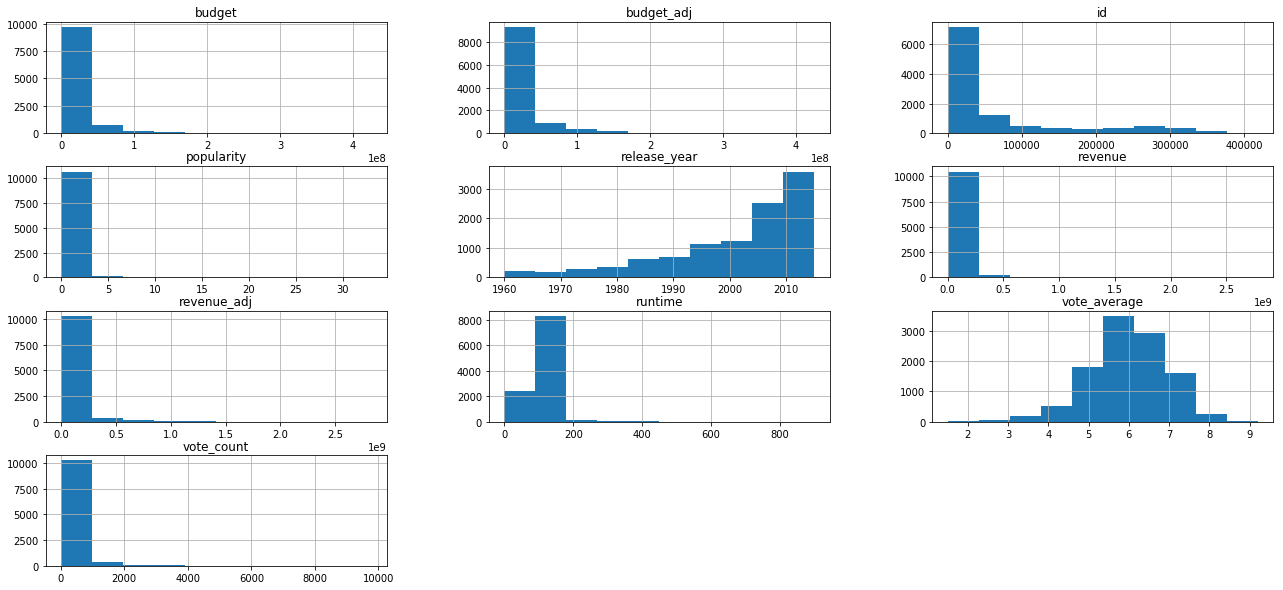

count    10834.000000
mean       102.162728
std         31.265059
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

In [17]:
# Use this, and more code cells, to explore your data. Don't forget to add
# Markdown cells to document your observations and findings.

# Mean histograms of Budget, popularity, runtime, vote_average and votecount over the years
# movies_df.groupby('release_year').mean()

movies_df.groupby('release_year').mean()
movies_df.hist(figsize=(22,10));
plt.legend(loc="upper right")
plt.show()

movies_df['runtime'].describe()

# Observations:
# All the histograms below are right skewed except for release year. This is because that data have a lower bound 
# where as release year have upper bound data.
# Vote_average histogram is a nice graph, could be close to symmetric or normal distribution. 
# But, I'll call this as a left skewed distribution
# Popular Runtime average of movies range between 90 - 111 minutes.  








### Research Question 2. Classify Movies based on different genres. Find out the highest number of movies made in each genre every year. Plot a final graph with all genres with the total number of movies made collectively.

['Adventure', 'Romance', 'Crime', 'Foreign', 'History', 'Mystery', 'Horror', 'Thriller', 'Music', 'Animation', 'Family', 'Drama', 'Fantasy', 'Documentary', 'TV Movie', 'Western', 'Comedy', 'War', 'Science Fiction', 'Action']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


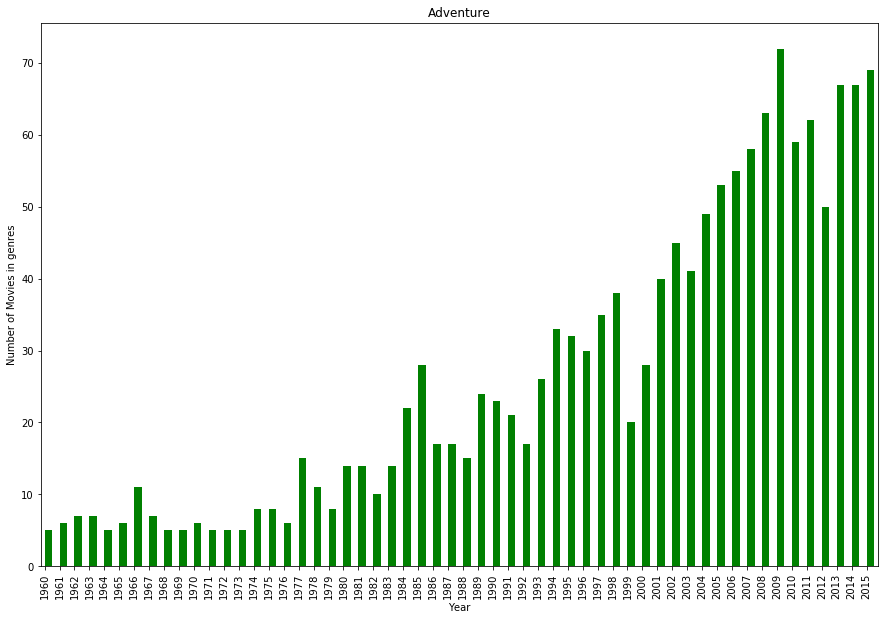

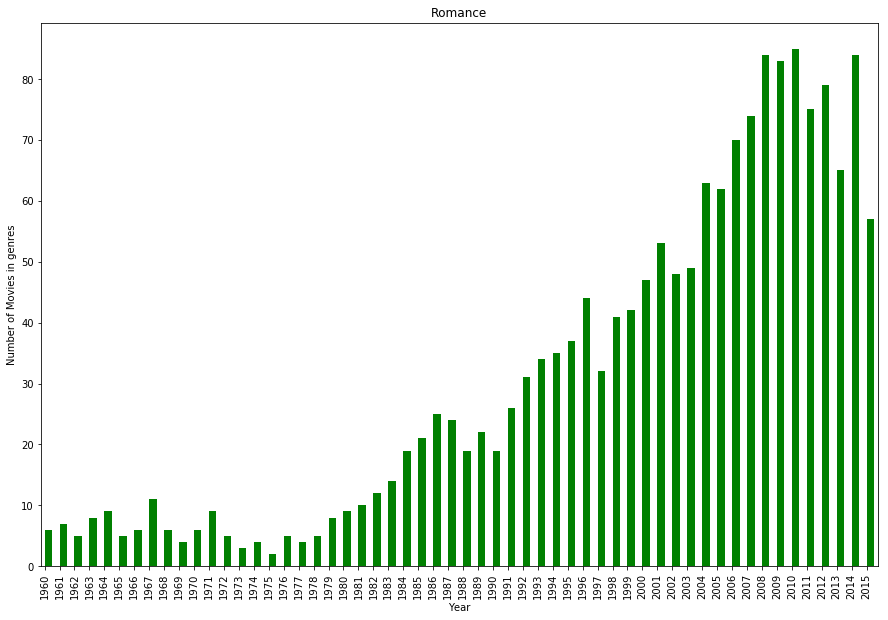

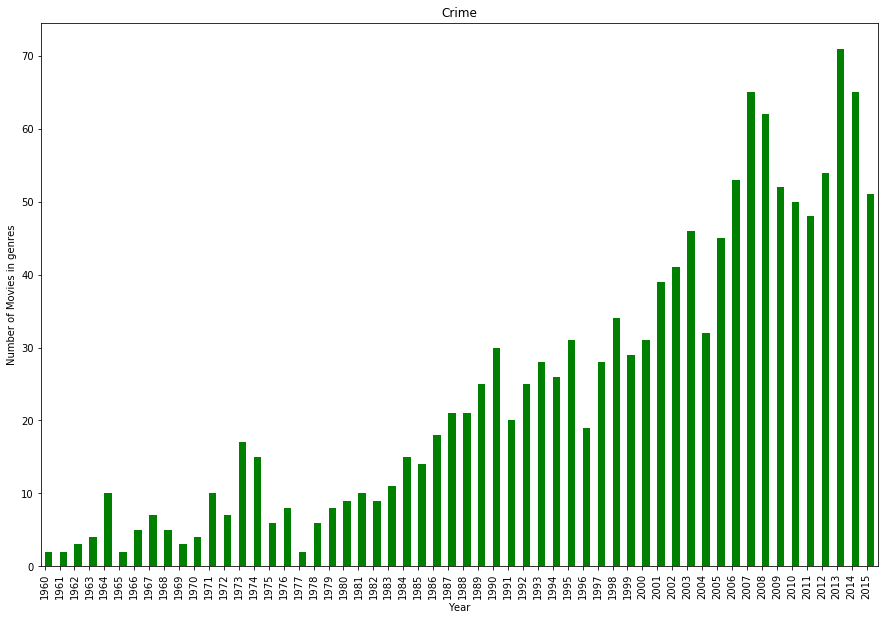

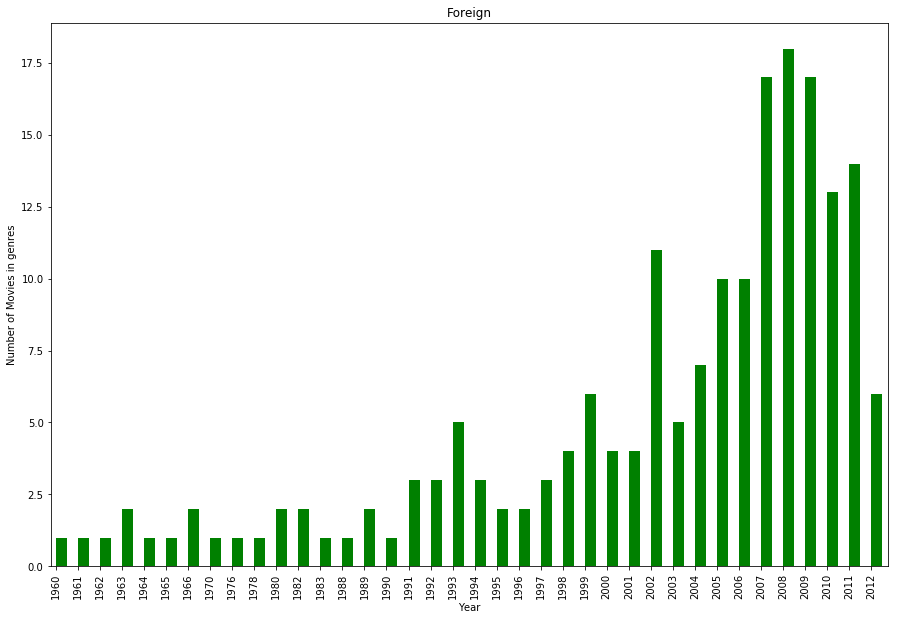

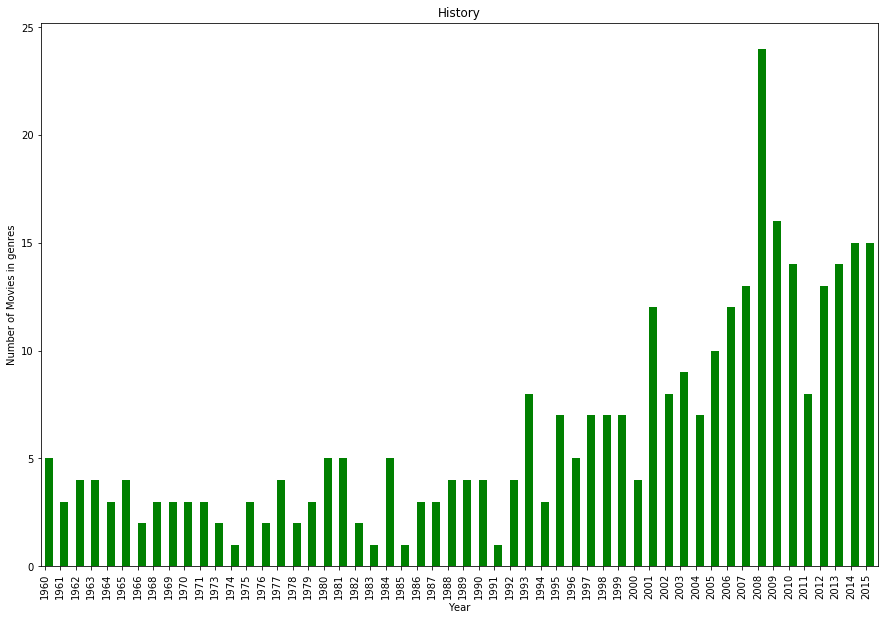

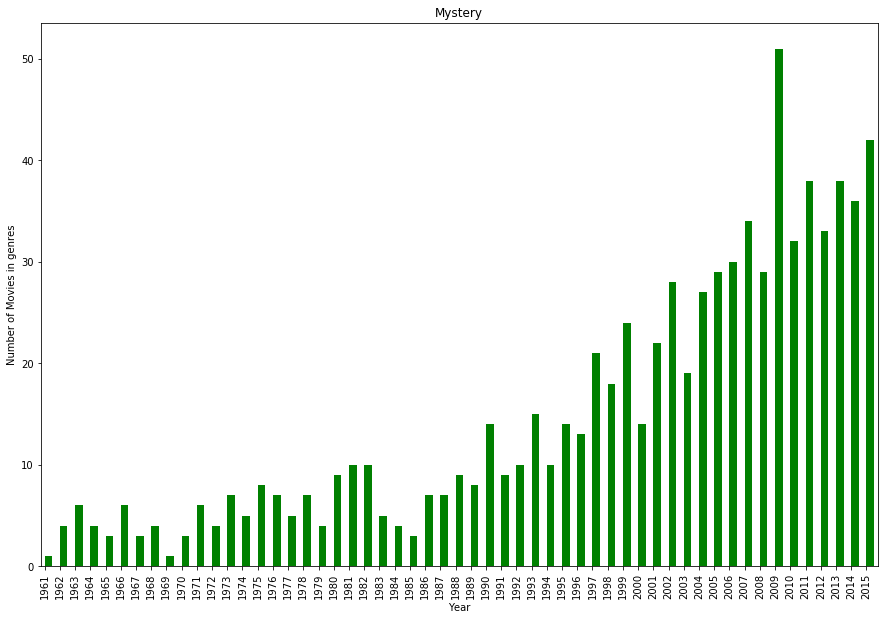

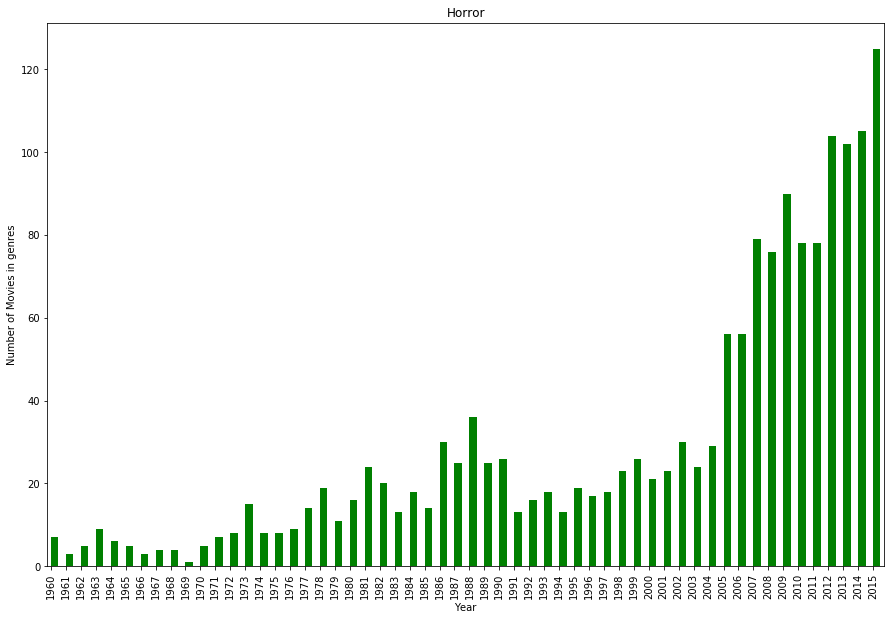

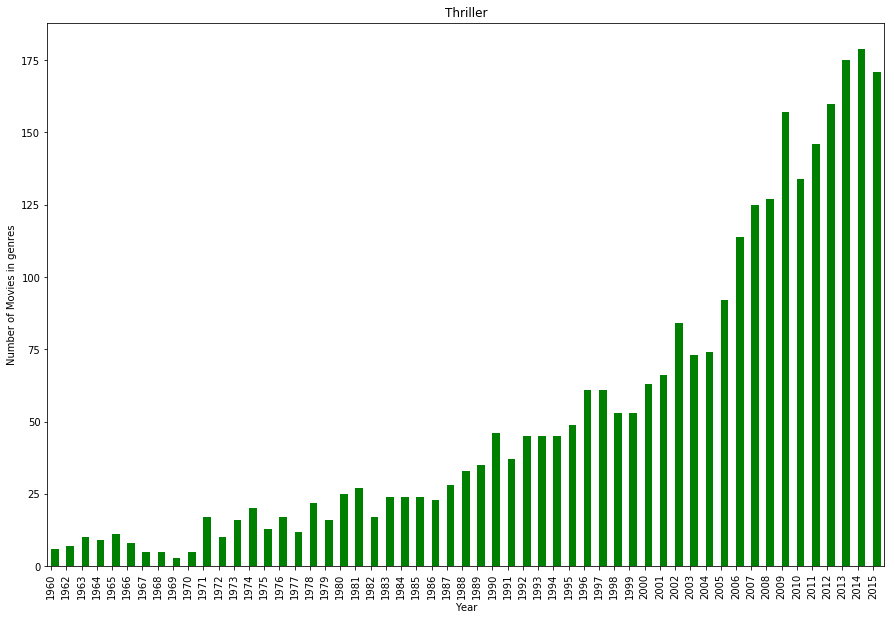

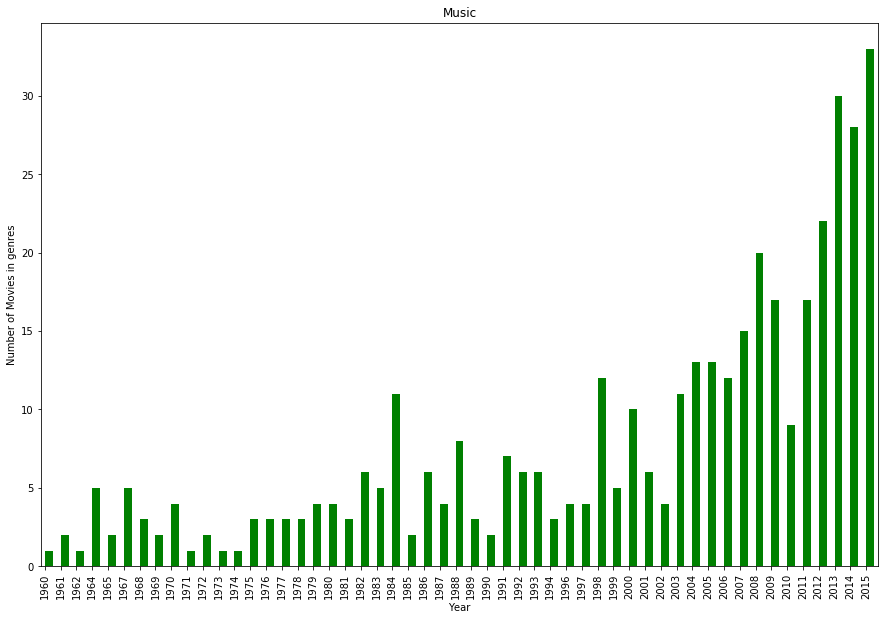

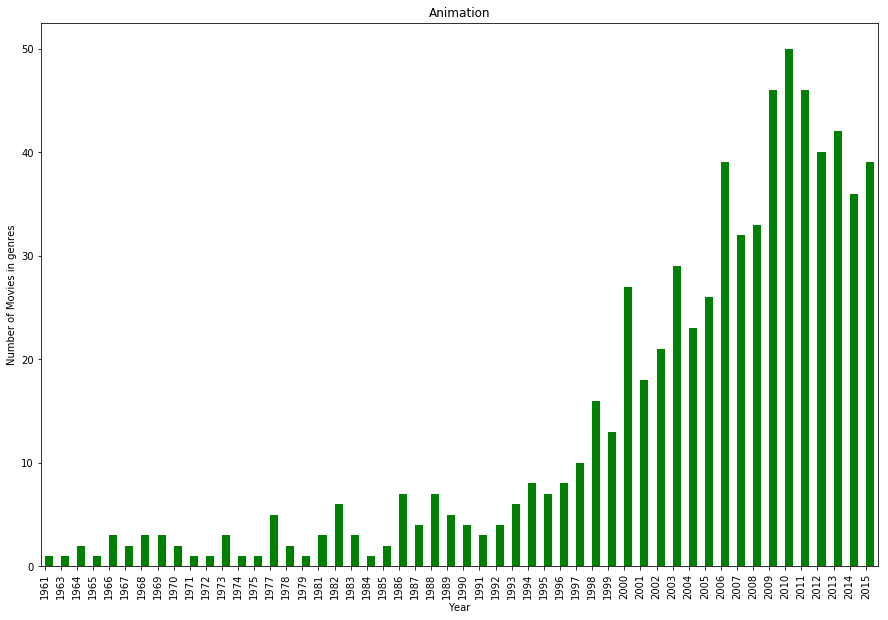

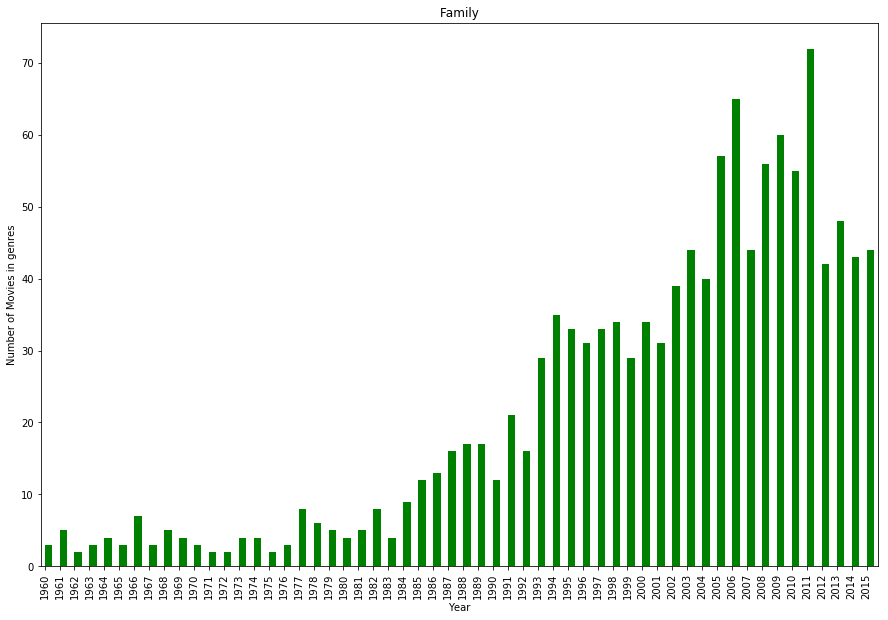

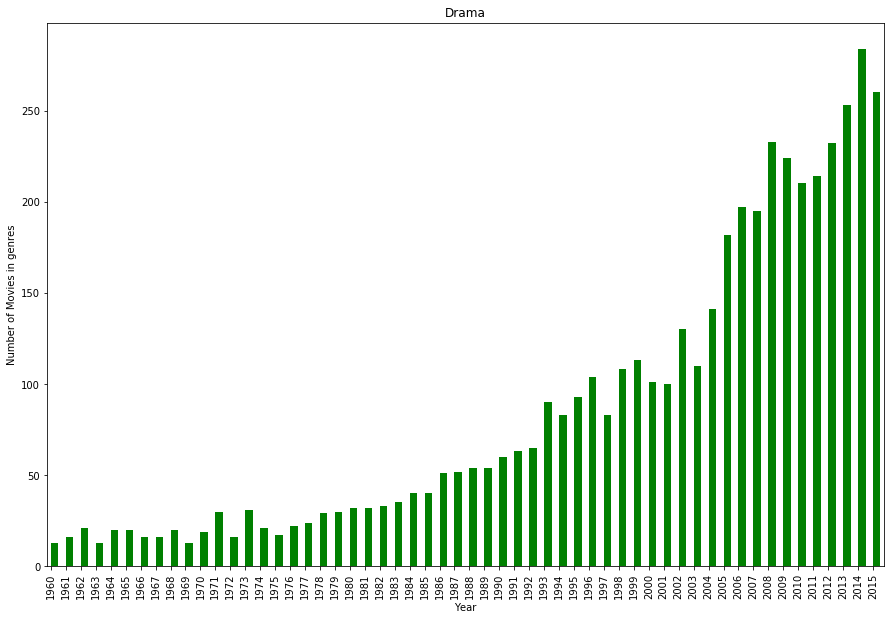

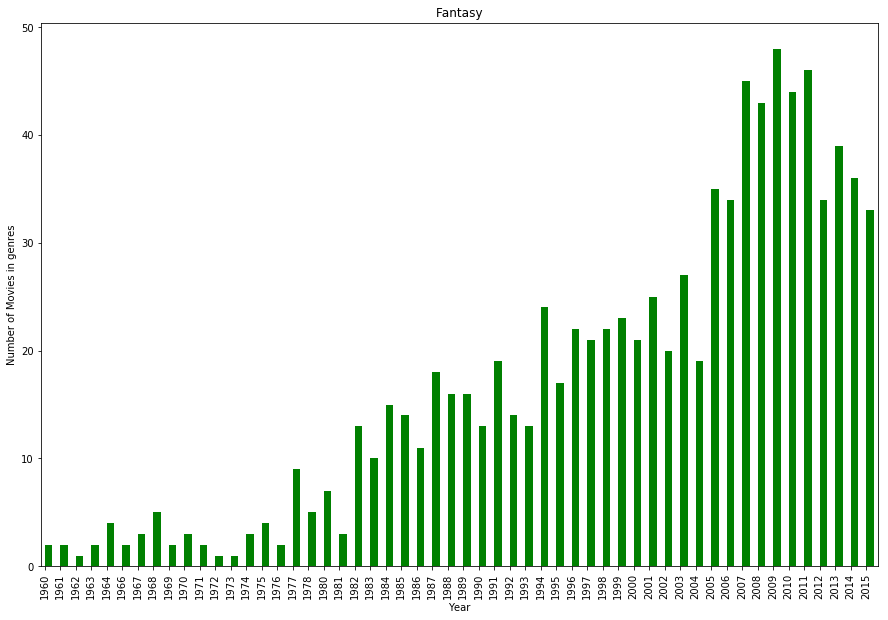

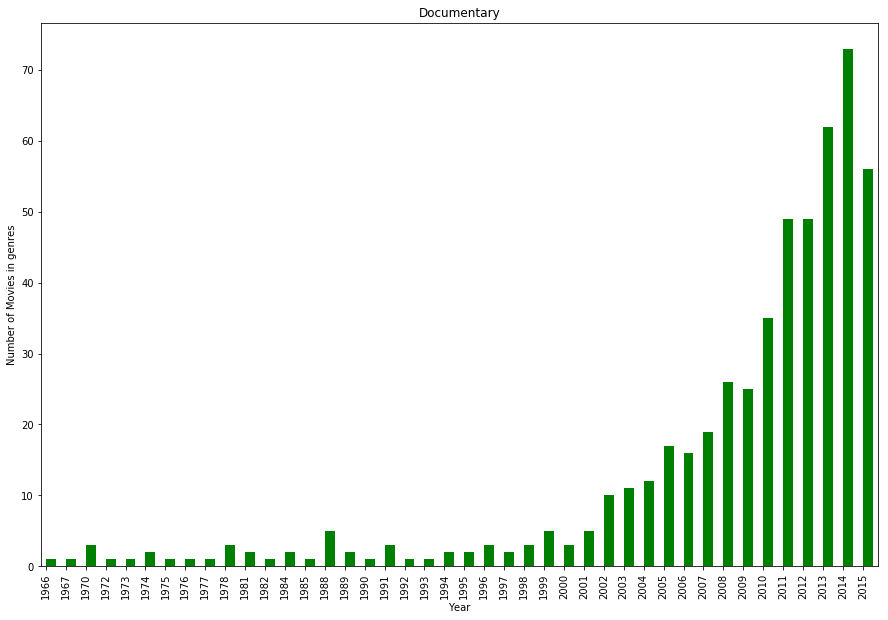

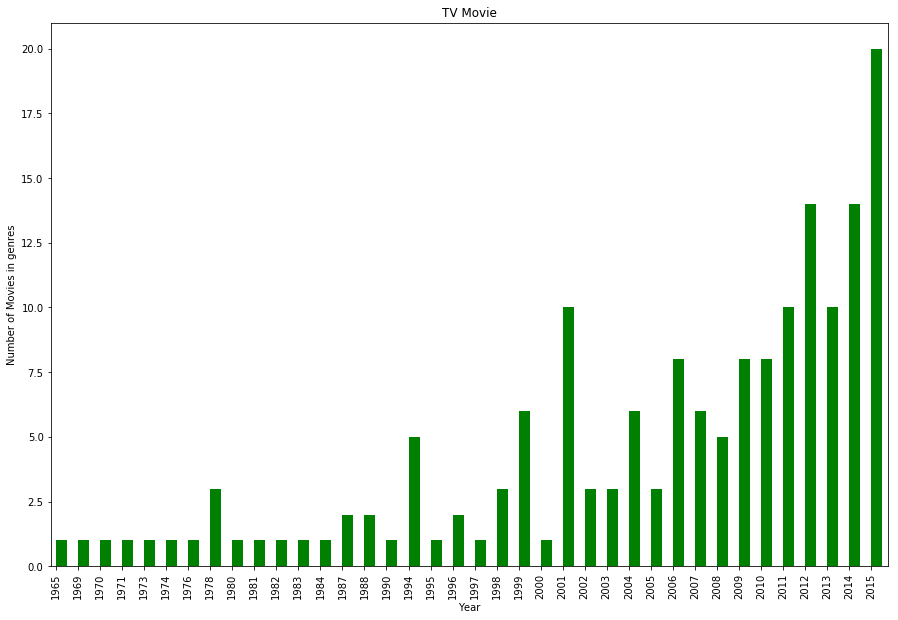

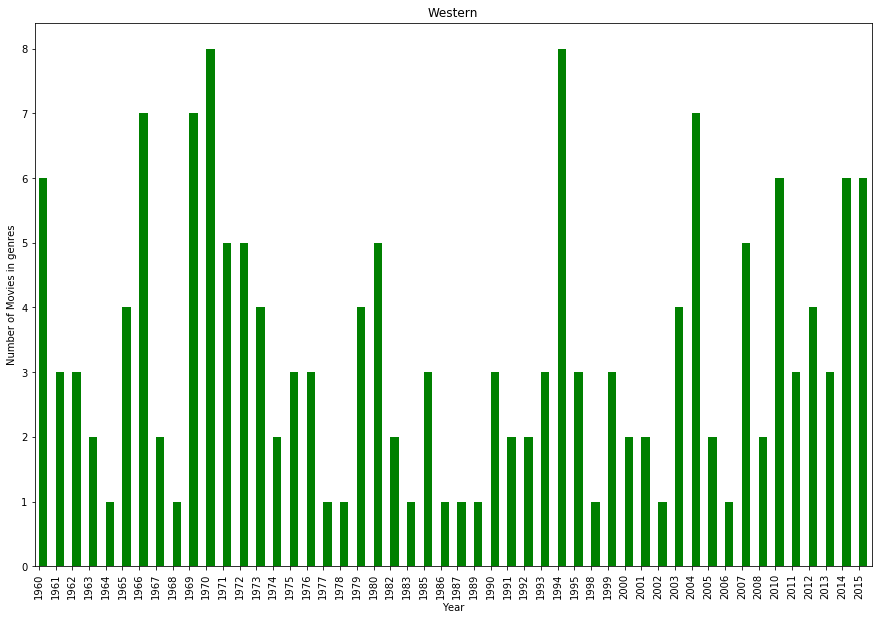

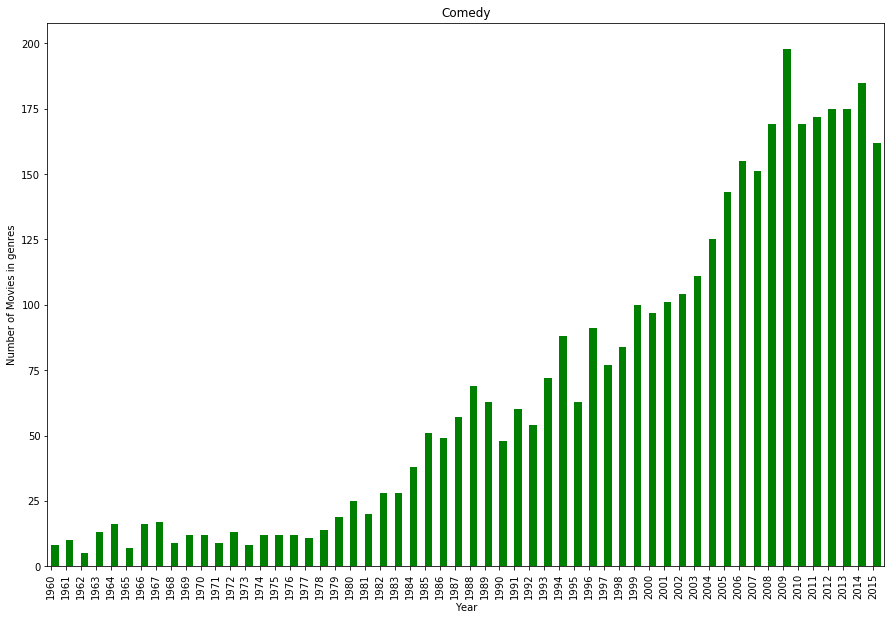

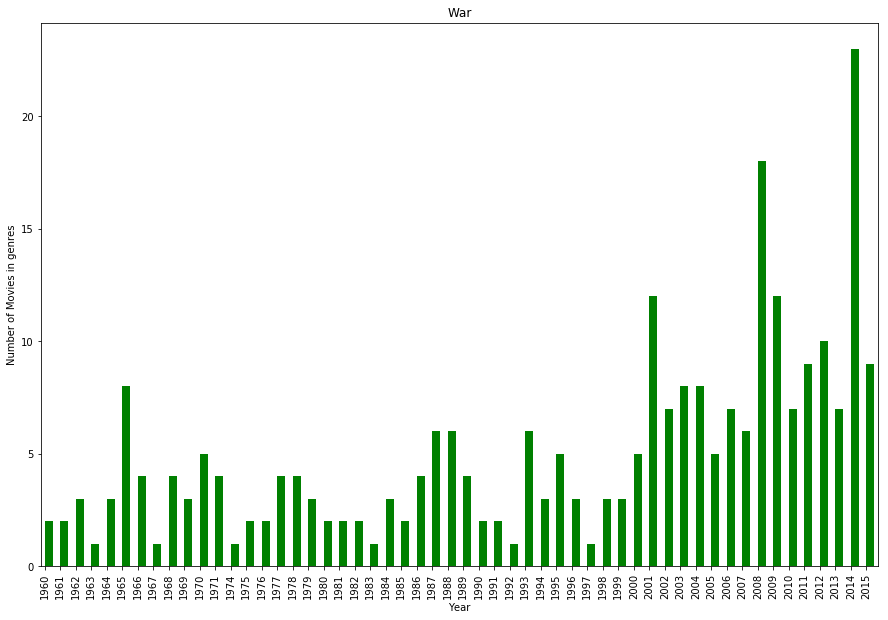

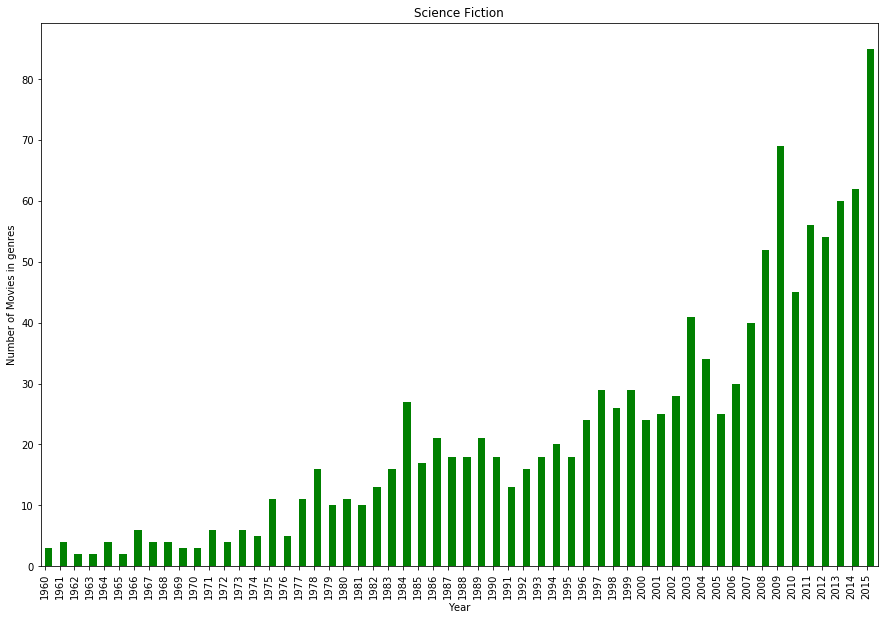

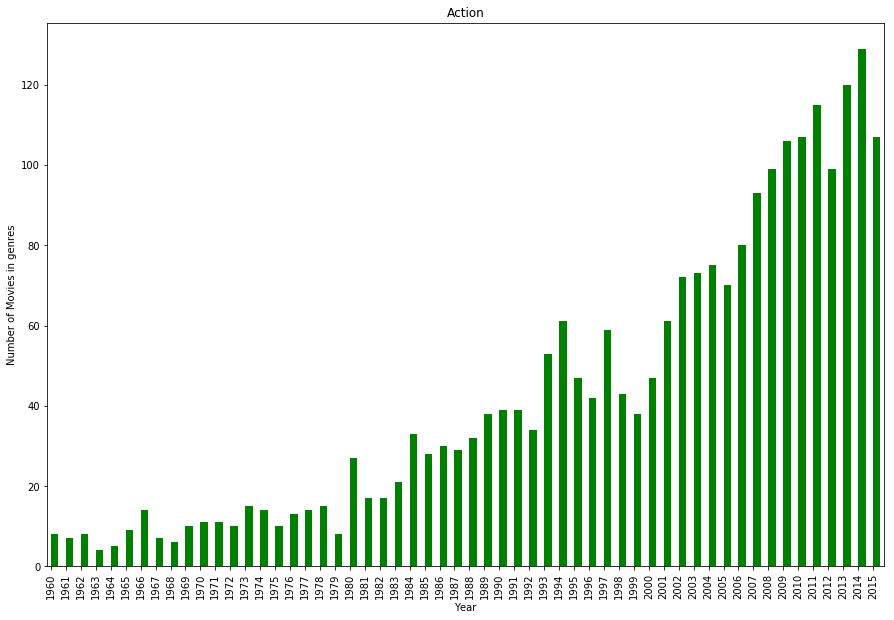

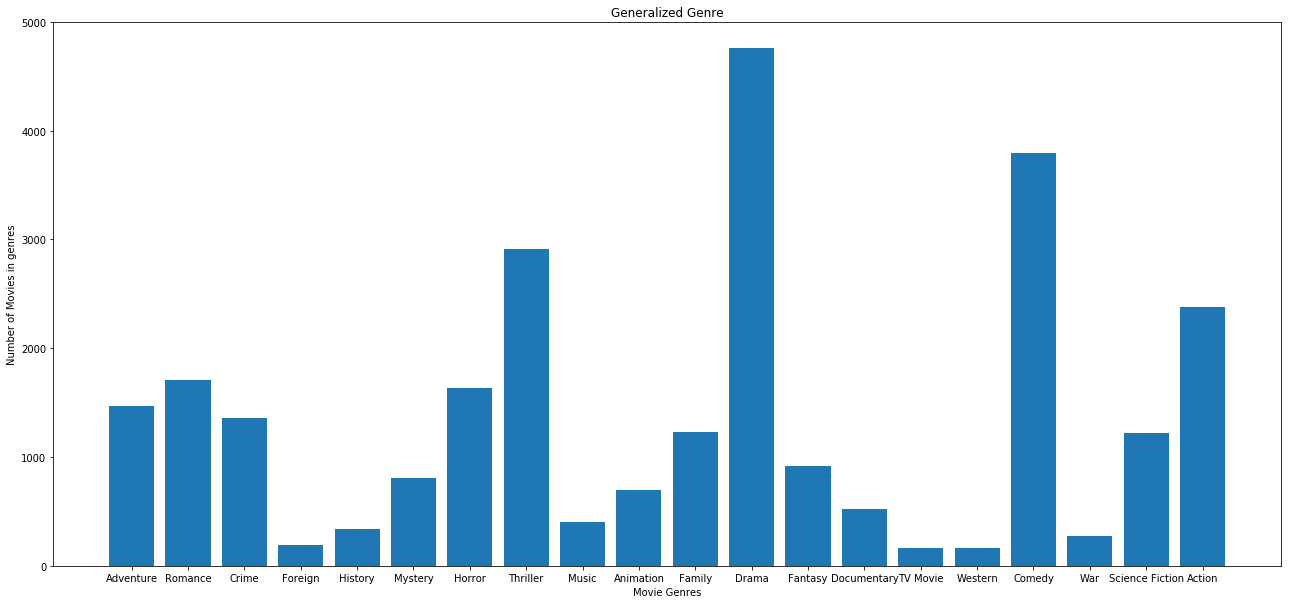

In [18]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


#Every movie can be classified under more than one genres as seen in this dataset. 
#I used the logic below to first separate genres into 20 different categories.



import pandas as pd, numpy as np

list_genres = set()
for i in movies_df['genres'].str.split('|'):
    list_genres = set().union(i, list_genres)
list_genres = list(list_genres)
print(list_genres)
df_reduced = movies_df[['imdb_id', 'original_title', 'release_year', 'vote_average']].reset_index(drop=True)

for genre in list_genres:
    df_reduced[genre] = movies_df['genres'].str.contains(genre).apply(lambda x:1 if x else 0)    
df_reduced[:100]
#df_reduced.head() to see the first 5 entries

newarr = []
xaxis = list(range(20))
print(xaxis)
list_newArr = set()

#Here, I'm plotting one graph for each genre and sseing the number of movies made every year.
def tableconst():
    for genre in list_genres:
        new_list = movies_df['genres'].str.contains(genre).fillna(False)
        number_of_genres = len(movies_df[new_list])
        newarr.append(number_of_genres)
        plt.figure(figsize=(15,10))
        plt.xlabel('Year')
        plt.title(str(genre))
        plt.ylabel('Number of Movies in genres')   
        movies_df[new_list].release_year.value_counts().sort_index().plot(kind='bar', align = 'edge', color='g', width = 0.5, alpha=1)
        plt.show()
        
tableconst() 

# Here I'm defining a function to plot a bar graph with total number of movies under each genre. 
#From the output, it is evident the movies made under Drama are the top category, followed by comedy and thriller.


def plotbargenre(xaxis, newarr):
    #print(len(list_genres))
    #print(len(newarr))
    #print(len(xaxis))
    #print(newarr)
    plt.figure(figsize=(22,10))
    plt.xlabel('Movie Genres')
    plt.title('Generalized Genre')
    plt.ylabel('Number of Movies in genres')
    plt.bar(xaxis, newarr)
    plt.xticks(xaxis, list_genres)
    plt.show()


plotbargenre(xaxis, newarr)
    



<a id='conclusions'></a>
## Conclusions

Vote average by the audience is a nice graph close to normal distribution but it is left skewed in perfect sense. Mean of Budget, popularity and vote counts are left skewed graphs. Large number of movies were made and released after 2005 year (highest between 2010-15). Runtime average of movies range between 90 - 111 minutes. Movies made under Drama are the top category, followed by comedy and then thriller in this dataset. 
However, this data analysis has some limitations:
1.We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only provided dataset. For example, the dataset does not confirm that every release of every director is listed.
2.Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards relationship being analyzed.
3.We have not considered type of vote positive or negative or any other value. etc.




In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])